Elections PCA Analysis

In [1]:
import ssl
import pandas as pd
import numpy as np
import seaborn as sns
import math
from matplotlib import pyplot as plt
import random
import statistics 
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.decomposition import PCA
import scipy as sc
import warnings
warnings.filterwarnings("ignore")

### Section 1

In [2]:
df1 = pd.read_csv('https://drive.google.com/u/3/uc?id=1oWHFIrfY-wfUu3aaquK-fcYDDGW8gws3&export=download')
df1.loc['total'] = df1.sum()
parties = pd.DataFrame(df1.iloc[-1, 11:].sort_values()[-13:]).index.values
parties_names = {'מחל':'ליכוד','פה':'יש עתיד','ט':'ציונות דתית','כן':'כחול לבן','שס':'שס','ג':'יהדות התורה','ל':'ישראל ביתנו','עם':'רעם','ום':'חדש-תעל','אמת':'העבודה','מרצ': 'מרצ','ד':'בלד', 'ב':'הבית היהודי'}
all_parties_dict = {   
    'אמת':'עבודה'
    ,'אצ':'חופש כלכלי'
    ,'ב':'הבית היהודי'
    ,'ג':'יהדות התורה'
    ,'ד':'בלד'
    ,'ום':'חדש-תעל'
    ,'ז':'שחר כוח חברתי'
    ,'זך':'קמ"ה'
    ,'זנ':'כח להשפיע'
    ,'זץ':'צומת'
    ,'ט':'הציונות הדתית'
    ,'י':'ישראל חופשית דמוקרטית'
    ,'יז':'הכלכלית החדשה'
    ,'ינ':'איחוד בני הברית'
    ,'יץ':'צו השעה'
    ,'יק':'הגוש התנכ״י'
    ,'כן':'המחנה הממלכתי'
    ,'ך':'אני ואתה'
    ,'ל':' ישראל ביתנו'
    ,'מחל':'הליכוד'
    ,'מרצ':'מרצ'
    ,'נז':'כבוד האדם'
    ,'ני':'נתיב'
    ,'נף':'שמע'
    ,'נץ':'העצמאים החדשים'
    ,'נק':'יש כיוון'
    ,'נר':'אנחנו'
    ,'עם':'רעם'
    ,'פה':'יש עתיד'
    ,'ף':'הפיראטים'
    ,'צ':'צעירים בוערים'
    ,'ץ':'מנהיגות חברתית'
    ,'ק':'קול הסביבה והחי'
    ,'קי':'הלב היהודי'
    ,'קך':'סדר חדש'
    ,'קנ':'כל קול קובע'
    ,'קץ':'באומץ בשבילך'
    ,'רז':'רשימת שלושים/ארבעים'
    ,'שס':'שס'
    ,'ת':'דעת טוב ורע'
    }

for i in all_parties_dict:
  if i not in parties_names.keys():
    all_parties_dict[i] = i

parties_reverse = [party[::-1] for party in list(parties_names.values())[::-1]]
parties_reverse1 = {party: party[::-1] for party in parties_names.values()}
df1 = df1.drop('total')

# This code creates a PCA object with 2 dimensions
pca = PCA(n_components=2)

# This code fits and transforms the data using the PCA object
transformed_data = pca.fit_transform(df1.iloc[0:, 11:].transpose())


In [3]:
def reduce_parties(df): # Helper function to remove unnecessary data
  for party in all_parties_dict.keys():
    if party not in parties and party in df.columns:
        df = df.drop(party, axis = 1)
  return df

In [4]:
# Create a scatter plot of the transformed data

fig = px.scatter(transformed_data, x= 0, y=1, text = all_parties_dict.values(), title = 'Scatter plot of 2 dimentional PCA')
fig.update_traces(textposition = 'top center')
fig.update_layout(xaxis_title="PC1", yaxis_title = 'PC2', title_x=0.5)
fig.show()

# לא שינינו שמות של מפלגות קטנות כדי שלא יעלו אחד על השני בגרף יותר מדי

Negative values in a PCA indicate that the corresponding original variables had a negative correlation with the other variables in the dataset. This can be useful for identifying patterns and relationships in the data. 

Looking at this graph, we can see the Y-axis represents political view, and the X-asix represents support freq.

The distance between the parties is not surprising, because as we would expect the big parties are relatively close on their X-axis and differ on the Y-axis by their political view.

As we move left on the X-axis, we can see the differences between the parties are getting smaller due to smaller support for the small parties.

### Section 2

In [5]:
df1_normalized = df1.iloc[0:, 11:]

for i in range(len(df1_normalized.transpose())):
  df1_normalized.iloc[0:, i] = df1_normalized.iloc[0:, i] / np.linalg.norm(df1_normalized.iloc[0:, i])

transformed_normalized_data = pca.fit_transform(df1_normalized.transpose())

fig = px.scatter(transformed_normalized_data, x=0, y=1, text = all_parties_dict.values(), title = 'Scatter plot of 2 dimentional PCA - Normalized')
fig.update_layout(xaxis_title="PC1", yaxis_title = 'PC2', title_x=0.5)
fig.update_traces(textposition = 'top center')
fig.show()

After the normalization according to the eucilidian norm, it can be seen that the y-axis still represents the political view. But the x-axis does not represent the support for the parties relatively as before.

We can mainly see that the x-axis on this graph better represents the variacne of voting, meaning most big parties are on the right and the Arab and Haredi parties are farther away, with Haredi parties being a bit closer to the rest.


### Section 3

In [6]:
df1_freq = df1.iloc[0:, 11:]

for col in df1_freq.columns:
    df1_freq[col] = df1_freq[col].divide(df1['כשרים'])

eshkol_hevrati_calcali = pd.read_csv('https://drive.google.com/u/3/uc?id=1HEgn_sX9KBtox77c_W0ZaXlvzCY6vAJ5&export=download')
eshkol_hevrati_calcali = eshkol_hevrati_calcali.rename(columns = {'set_code':'סמל ישוב'})

joined_df = df1.join(eshkol_hevrati_calcali.set_index('סמל ישוב'), on='סמל ישוב')
joined_df.iloc[0:, 11:51] = df1_freq
joined_df['eco_level'][joined_df['סמל ישוב'] == 9999] = 0 # Dealing with 'מעטפות חיצוניות'
joined_df = joined_df[joined_df['eco_level'].notna()]
transformed_freq_data = pca.fit_transform(joined_df.iloc[0:, 11:51])


In [7]:
fig = px.scatter(transformed_freq_data, x=0, y=1, color = joined_df['eco_level'],
                 title = "Scatter plot of Eshkol socio economic", labels = {'color': 'Eshkol'})
fig.update_traces(textposition = 'top center')
fig.update_layout(xaxis_title="PC1", yaxis_title = 'PC2', title_x=0.5)
fig.show()

Looking at the graph, we can assume that the Y axis still represents the overall political view, and the x-axis represents the party support.

Comparing this graph to the previous ones, we can assume that they represent the data mirrored about the same, meaning Arab parties are on the right edge  and Haredi parties being on top in the middle. Most other parties are on the left axis around the middle.

Looking at the graph from a socio-economic aspect, we can conclude that most  support from the higher social-ecomonic cities is on the left side of the graph. In particular, as you go down and to the left, the support for leftist parties is higher. On the other hand, on the right side is the lower social-ecomnoic groups support for the sectoral parties, which are Haredi and Arab parties, where Arab parties are below the x-axis and Haredi parties are above it.

### Section 4

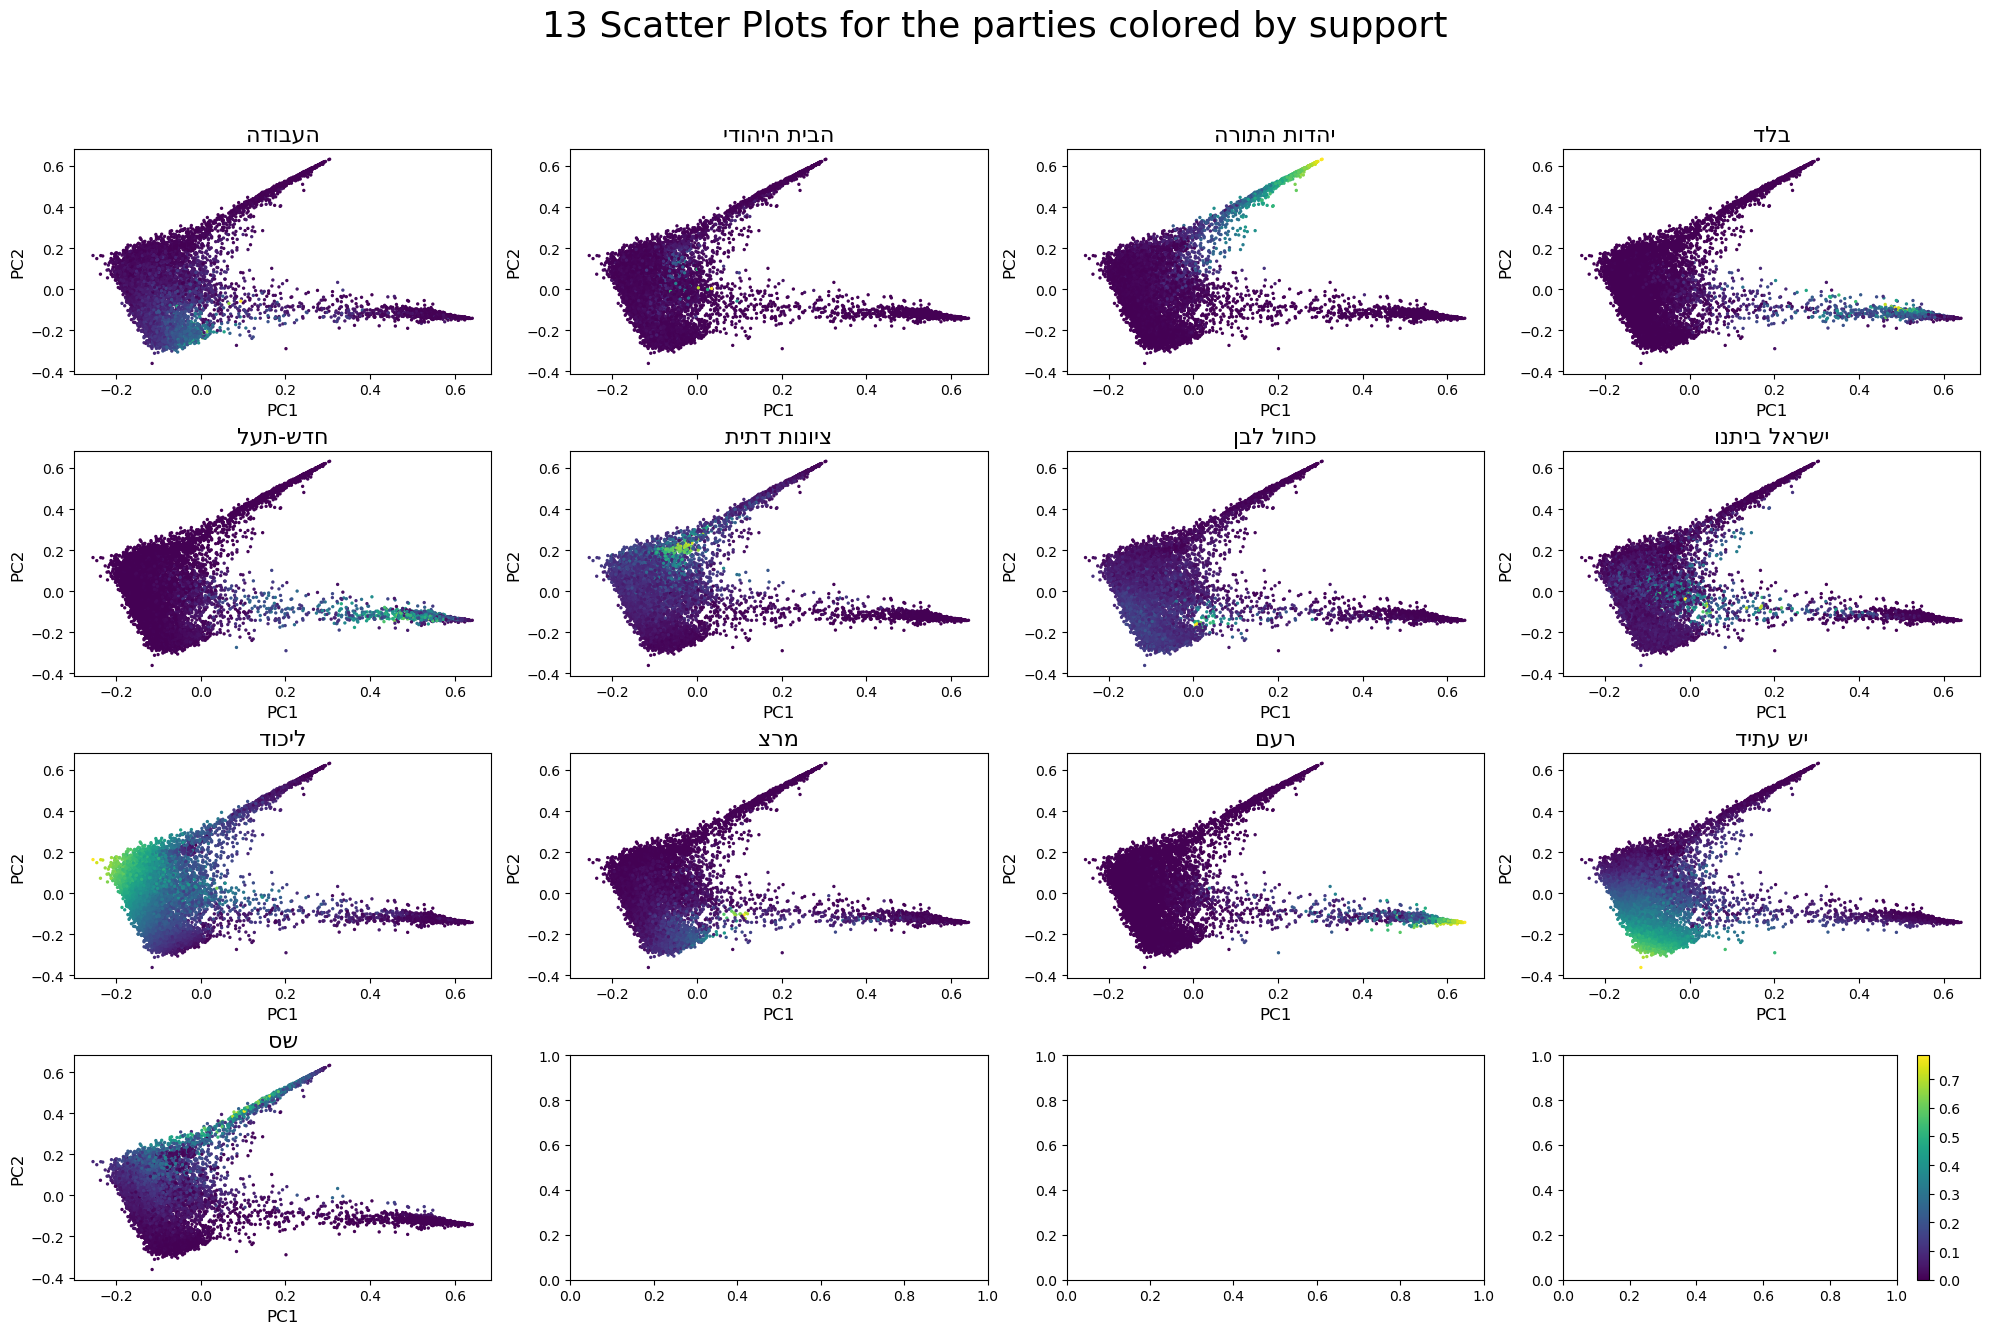

In [8]:
df_parties = reduce_parties(joined_df)

transformed_parties_freq_data = pca.fit_transform(df_parties.iloc[0:, 11:24])

fig, axs = plt.subplots(figsize=(20,14), nrows = 4, ncols = 4)
st = fig.suptitle('13 Scatter Plots for the parties colored by support', fontsize=26)

for i in range(1, 14): 

  bar_title = parties_reverse1[parties_names[df_parties.columns[10 + i]]]
  row = (i-1)//4
  column = (i-1)%4
  colors = df_parties.iloc[0:, 10+i]

  pca_plot = axs[row, column].scatter(transformed_parties_freq_data[:, 0], transformed_parties_freq_data[:, 1], s = 2, c = colors)
  
  axs[row, column].set_title(bar_title, fontsize=16)
  axs[row, column].set_xlabel('PC1', fontsize=12)  
  axs[row, column].set_ylabel('PC2', fontsize=12)  

plt.colorbar(pca_plot) 
fig.tight_layout() 

# shift subplots down:
st.set_y(0.95)
fig.subplots_adjust(top=0.85)


Looking at the results above we can note that Yahadut Hatora party main support is located at the upper right meaning, by the previous graph, their main voters social economic status is low and they are right-winged, with a medium support rate. This is in contrast to Yesh Atid supporters who are on the lower left meaning they are left-winged and on a higher social economic status. We can also see the have a high support rate by their position on the x-axis.


### Section 5

In [9]:
combined_df = pd.DataFrame(data = transformed_freq_data, columns = ['pc1', 'pc2'])
combined_df['סמל ישוב'] = joined_df['סמל ישוב']
combined_df_jerus = combined_df.loc[combined_df['סמל ישוב'] == 3000] # Filtering Jerusalem by סמל ישוב

fig = px.scatter(combined_df_jerus, x='pc1', y='pc2',
                 title = "Scatter plot of PCA for all - filtered to Jerusalem only")
fig.update_layout(xaxis_title="PC1", yaxis_title = 'PC2', title_x=0.5)
fig.show()

In [10]:
jerus_df = df1.loc[df1['סמל ישוב'] == 3000] 
for col in df1.iloc[0:, 11:].columns:
    jerus_df[col] = jerus_df[col].divide(jerus_df['כשרים'])

jerus_df_joined = jerus_df.join(eshkol_hevrati_calcali.set_index('סמל ישוב'), on='סמל ישוב')
jerus_df_joined.iloc[0:, 11:51] = jerus_df.iloc[0:, 11:]
jerus_df_joined = jerus_df_joined.dropna()
transformed_parties_jerus = pca.fit_transform(jerus_df_joined.iloc[0:, 11:51])

fig = px.scatter(transformed_parties_jerus, x=0, y=1,
                 title = "Scatter plot - PCA of Jerusalem only")
fig.update_layout(xaxis_title="PC1", yaxis_title = 'PC2', title_x=0.5)
fig.show()

Looking at the 2 graphs, we can clearly see they are different, both in distribution around the middle and overall shape. 

My claim is that it is not possible to get one graph from the other by doing any kind of transformation. This is due to the fact that the graphs are plotted with information of different PCA's, which are calculted by different orthogonal vectors, and thus it is not possible to get one from the other by the suggested methods.

In [11]:
first_graph = np.cov(combined_df_jerus.iloc[0:, :2]).trace()

second_graph = np.cov(transformed_parties_jerus).trace()

print(f'The variance of the first graph is {first_graph} and is smaller than the second graph which is {second_graph}')

The variance of the first graph is 26.558117683985696 and is smaller than the second graph which is 39.7501807895667


Looking at the results, we can see that the first graph's points VAR is smaller than the second one. I claim this is because the points from the first graph are calculated in a bigger enviorment, with all other cities data. The second graph, on the other hand is calculated on a samller dataframe which is reduced to Jerusalem only. Due to the first graph's bigger data analysis, the variacne is lower than the second one.

### Section 6

I should note that for section 5 I used the last dataframe, which is the one normalized for Jerusalem's PCA calculated alone.

In [12]:
pca = PCA(n_components = len(all_parties_dict))
PC = pca.fit_transform(jerus_df_joined.iloc[0:, 11:51])

var = pca.explained_variance_ratio_ * 100
var2 = var.copy()
var2 = [sum(var[0:i]) for i in range(len(var))]

fig = px.bar(x= range(1, len(all_parties_dict) + 1), y = var2, title = 'Explained Variance by number of PCA components - Jerusalem')
fig.update_layout(xaxis_title="Number of PCA components", yaxis_title = 'Explained Variance', title_x=0.5)
fig.add_hline(y=80, line_color = 'red',
              annotation_text="80%",
              annotation_position="bottom left")
fig.add_hline(y=95, line_color = 'black',
              annotation_text="95%",
              annotation_position="bottom left")
fig.add_hline(y=99, line_color = 'green',
              annotation_text="99%",
              annotation_position="top left")
fig.show()


In [13]:
print(f'In order to get at least 80% explained variance we need at least {np.where(np.array(var2) >= 80)[0][0]} PCA componets.')
print(f'In order to get at least 95% explained variance we need at least {np.where(np.array(var2) >= 95)[0][0]} PCA componets.')
print(f'In order to get at least 99% explained variance we need at least {np.where(np.array(var2) >= 99)[0][0]} PCA componets.')

In order to get at least 80% explained variance we need at least 2 PCA componets.
In order to get at least 95% explained variance we need at least 5 PCA componets.
In order to get at least 99% explained variance we need at least 7 PCA componets.
